##1.Defining the Question
- Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

- Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

###a) The Question

What are the major symptoms for hypothyrodism?

###b)The Metric Of Success

The accuracy score and relevance of the models.
###c)Experimental Design

- Defining the question
- Importing the library
- Loading the data
- Previewing the data
- Feature engineering
- EDA
- AdaBoost classification
- Random Forest classification
- Gradiend boost classification
- polynomial kernel SVM
- linear kernel SVM
- Conclussion


##2.Loading and previewing the dataset

###a)Importing library

In [61]:
#Importing pandas
import pandas as pd

#Importing numpy
import numpy as np
from numpy import nan
#importing matplotlib
import matplotlib.pyplot as plt

#Importing sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
#importting seabborn
import seaborn as sns
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
#importing scipy
import scipy.stats as stats
import scipy as sp
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

###b)Loading the dataset

In [62]:
#Load hypothyloid dataset
hypothyloid = pd.read_csv("http://bit.ly/hypothyroid_data")

###c)Previewing the dataset

In [63]:
#Previewing 
hypothyloid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [64]:
hypothyloid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [65]:
#Shape of the dataset
hypothyloid.shape

(3163, 26)

the dataset dataset has 3163 rows and 26 columns

In [66]:
#Summary of the dataset
hypothyloid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

all the variables has object as the datatype hence they will be encoded for better analysis

In [67]:
#columns in the dataset
hypothyloid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [68]:
#Target variable which is status
#Check the distribution
hypothyloid['status'].value_counts()

negative       3012
hypothyroid     151
Name: status, dtype: int64

In [69]:
#Percentage distribution of status column
hypothyloid['status'].value_counts()/np.float(len(hypothyloid))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


negative      0.952
hypothyroid   0.048
Name: status, dtype: float64

The percentage of observations of the class label 0 and 1 is 96.5% and 35%. So, this is a class imbalanced problem. 

**Previewing the nature of each column**

In [70]:
#Status
hypothyloid['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

In [71]:
#age
hypothyloid['age'].value_counts()

?     446
59     64
60     64
62     63
28     60
     ... 
5       1
8       1
7       1
4       1
93      1
Name: age, Length: 93, dtype: int64

In [72]:
#Status
hypothyloid['sex'].value_counts()

F    2182
M     908
?      73
Name: sex, dtype: int64

**?** represent people who are affected hormons and their gender is nor clearly dwfined since they prefer not to dislose it and they will be factored as **U (unique)**

In [73]:
#Replacing ? with U
hypothyloid['sex'] = hypothyloid['sex'].replace(['?'],['U'])


In [74]:
#on_thyroxine
hypothyloid['on_thyroxine'].unique()

array(['f', 't'], dtype=object)

In [75]:
#query_on_thyroxine
hypothyloid['query_on_thyroxine'].unique()

array(['f', 't'], dtype=object)

In [76]:
#on_antithyroid_medication
hypothyloid['on_antithyroid_medication'].unique()

array(['f', 't'], dtype=object)

In [77]:
#TBG
hypothyloid['TBG'].unique()

array(['?', '28', '34', '0', '19', '30', '25', '48', '39', '31', '16',
       '21', '37', '40', '27', '3.10', '38', '108', '20', '36', '17',
       '23', '35', '32', '63', '9.30', '15', '26', '33', '41', '110',
       '22', '43', '53', '80', '47', '29', '13', '24', '18', '45', '86',
       '50', '8.40', '52', '11', '12', '14', '65', '7.30', '8.50', '69',
       '122'], dtype=object)

In [78]:
#T4U
hypothyloid['T4U'].unique()

array(['1.48', '1.13', '1', '1.04', '1.28', '1.19', '0.86', '1.05',
       '1.21', '1.02', '0.92', '1.29', '0.98', '1.08', '1.01', '1.18',
       '1.10', '1.27', '0.83', '1.11', '0.78', '1.39', '1.12', '0.93',
       '0.99', '0.90', '1.06', '0.68', '0.67', '1.14', '0.80', '0.96',
       '0.95', '1.46', '1.03', '0.97', '0.94', '1.09', '1.24', '1.23',
       '1.53', '1.26', '1.40', '1.17', '0.87', '0.61', '0.70', '1.07',
       '1.73', '1.45', '1.20', '0.89', '0.84', '0.91', '0.85', '1.35',
       '0.82', '1.50', '0.74', '1.71', '1.79', '0.73', '0.77', '1.25',
       '?', '0.88', '0.72', '0.31', '0', '0.79', '0.81', '0.71', '1.93',
       '1.32', '0.66', '1.68', '1.42', '1.70', '1.83', '1.41', '1.34',
       '1.65', '1.22', '0.75', '1.74', '0.69', '1.51', '0.76', '1.16',
       '0.35', '0.62', '0.54', '1.36', '1.33', '1.30', '0.48', '1.59',
       '1.75', '1.86', '1.38', '1.43', '1.62', '2.01', '0.30', '1.31',
       '1.15', '1.57', '0.55', '1.66', '0.52', '1.97', '1.47', '0.36',
       

In [79]:
#FTI_measured
hypothyloid['FTI_measured'].unique()

array(['y', 'n'], dtype=object)

In [80]:
#tumor
hypothyloid['tumor'].unique()

array(['f', 't'], dtype=object)

In [81]:
#pregnant
hypothyloid['pregnant'].unique()

array(['f', 't'], dtype=object)

In [82]:
#lithium
hypothyloid['lithium'].unique()

array(['f', 't'], dtype=object)

In [83]:
#goitre
hypothyloid['goitre'].unique()

array(['f', 't'], dtype=object)

In [84]:
#converting some columns which has object datatype to numeric
columns=['T3','T4U','TBG','age','TSH','FTI','TT4']
#Converting the colums to float
hypothyloid[columns]=hypothyloid[columns].apply(pd.to_numeric, errors='coerce')

In [85]:
hypothyloid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.000,M,f,f,f,f,f,f,f,...,y,0.600,y,15.000,y,1.480,y,10.000,n,NaN
1,hypothyroid,15.000,F,t,f,f,f,f,f,f,...,y,1.700,y,19.000,y,1.130,y,17.000,n,NaN
2,hypothyroid,24.000,M,f,f,f,f,f,f,f,...,y,0.200,y,4.000,y,1.000,y,0.000,n,NaN
3,hypothyroid,24.000,F,f,f,f,f,f,f,f,...,y,0.400,y,6.000,y,1.040,y,6.000,n,NaN
4,hypothyroid,77.000,M,f,f,f,f,f,f,f,...,y,1.200,y,57.000,y,1.280,y,44.000,n,NaN


###3)Feature Engineering

###a)Dealing with Null Values

In [86]:
#checking null values
hypothyloid.isnull().sum()

status                          0
age                           446
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

'T3','T4U','TBG','age','TSH','FTI','TT4' columns has very high number of null values hence they wont be dropped. Instead, the null values will be imputed randomly.

In [87]:
#Filling null values
hypothyloid[['T3','T4U','TBG','age','TSH','FTI','TT4']]=hypothyloid[['T3','T4U','TBG','age','TSH','FTI','TT4']].replace(0,nan)
hypothyloid.fillna(hypothyloid.mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


###b)Dealing with Duplicates

In [88]:
#Checking for duplicates
hypothyloid.duplicated().sum()

77

In [89]:
#Dropping duplicate values
hypothyloid.drop_duplicates(inplace=True)

In [90]:
hypothyloid.duplicated().sum()

0

The duplicates have benn fully removed

###c)dealing with Outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


Text(0, 0.5, 'TT4')

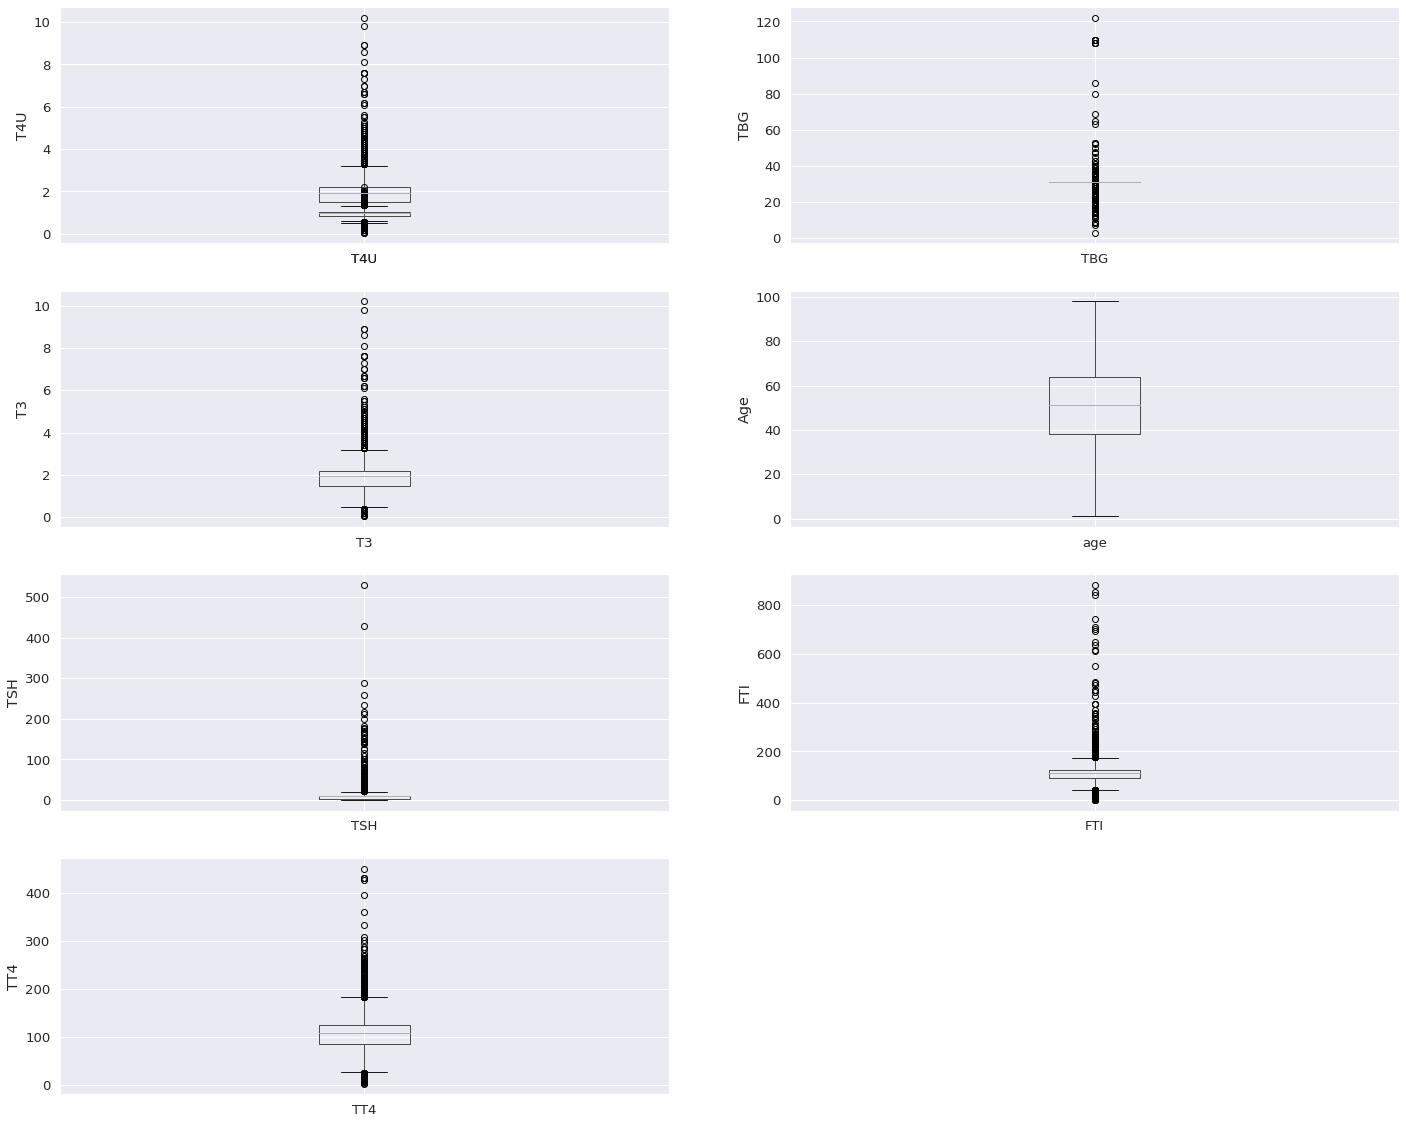

In [91]:
#Drawing boxplots to visualize outliers
plt.figure(figsize=(24,20))

plt.subplot(4,2,1)
fig=hypothyloid.boxplot(column='T3')
fig.set_title('')
fig.set_ylabel('T3')

plt.subplot(4,2,1)
fig=hypothyloid.boxplot(column='T4U')
fig.set_title('')
fig.set_ylabel('T4U')

plt.subplot(4,2,2)
fig=hypothyloid.boxplot(column='TBG')
fig.set_title('')
fig.set_ylabel('TBG')

plt.subplot(4,2,3)
fig=hypothyloid.boxplot(column='T3')
fig.set_title('')
fig.set_ylabel('T3')

plt.subplot(4,2,4)
fig=hypothyloid.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(4,2,5)
fig=hypothyloid.boxplot(column='TSH')
fig.set_title('')
fig.set_ylabel('TSH')

plt.subplot(4,2,6)
fig=hypothyloid.boxplot(column='FTI')
fig.set_title('')
fig.set_ylabel('FTI')

plt.subplot(4,2,7)
fig=hypothyloid.boxplot(column='TT4')
fig.set_title('')
fig.set_ylabel('TT4')

Age does not have outliers

In [92]:
#Removing outliers
hypothyloid=hypothyloid[(np.abs(stats.zscore(hypothyloid[['T3','T4U','TBG','TSH','FTI','TT4']]))<3).all(axis=1)]

Most of the outliers have been removed at this stage, the remaining will be solved during regression and classification

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0, 0.5, 'TT4')

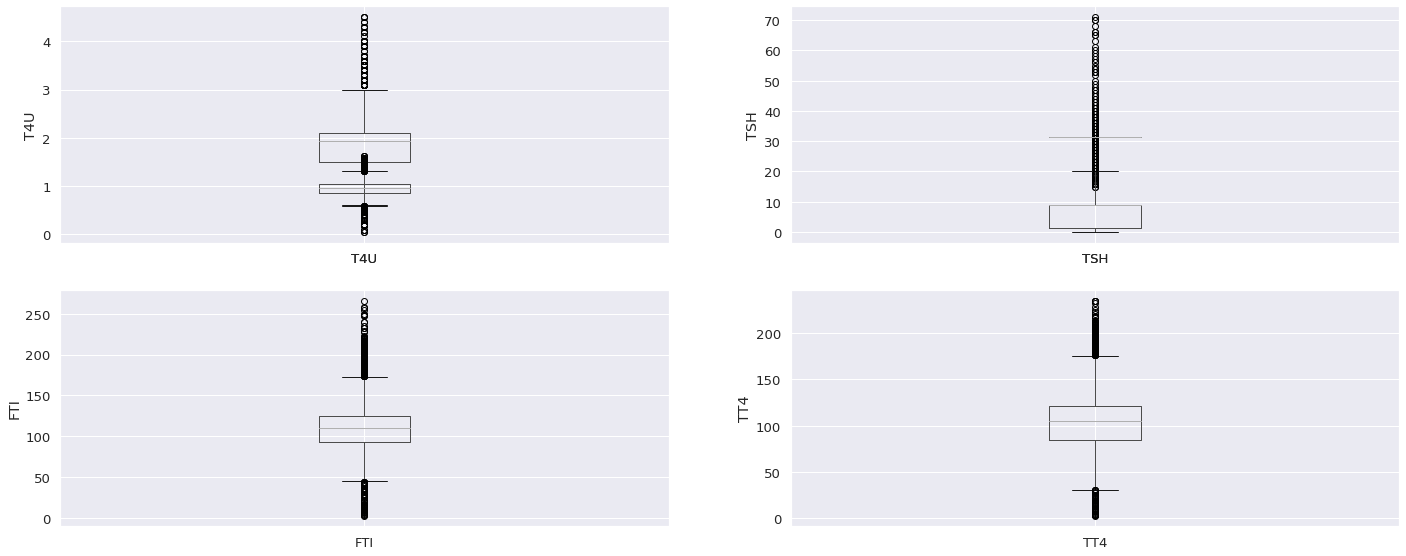

In [150]:
#Drawing boxplots to visualize outliers after removing the outliers
plt.figure(figsize=(24,20))

plt.subplot(4,2,1)
fig=hypothyloid.boxplot(column='T3')
fig.set_title('')
fig.set_ylabel('T3')

plt.subplot(4,2,1)
fig=hypothyloid.boxplot(column='T4U')
fig.set_title('')
fig.set_ylabel('T4U')

plt.subplot(4,2,2)
fig=hypothyloid.boxplot(column='TBG')
fig.set_title('')
fig.set_ylabel('TBG')



plt.subplot(4,2,2)
fig=hypothyloid.boxplot(column='TSH')
fig.set_title('')
fig.set_ylabel('TSH')

plt.subplot(4,2,3)
fig=hypothyloid.boxplot(column='FTI')
fig.set_title('')
fig.set_ylabel('FTI')

plt.subplot(4,2,4)
fig=hypothyloid.boxplot(column='TT4')
fig.set_title('')
fig.set_ylabel('TT4')

###d) Dealing with Anomalies

Several columns had ? as part of the input and they were removed.

###e) Multicolineality

In [93]:
#Checking for correlation
correlation = hypothyloid.corr()
correlation

,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.000,-0.011,-0.269,-0.044,-0.135,0.036,0.066
TSH,-0.011,1.000,-0.141,-0.248,0.068,-0.253,-0.045
T3,-0.269,-0.141,1.000,0.420,0.419,0.188,-0.018
TT4,-0.044,-0.248,0.420,1.000,0.342,0.812,-0.009
T4U,-0.135,0.068,0.419,0.342,1.000,-0.208,-0.015
FTI,0.036,-0.253,0.188,0.812,-0.208,1.000,-0.010
TBG,0.066,-0.045,-0.018,-0.009,-0.015,-0.010,1.000


In [94]:
#Calculating VIF Score
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.092,0.031,0.318,0.002,-0.010,-0.095,-0.066
TSH,0.031,1.129,0.138,0.800,-0.506,-0.496,0.046
T3,0.318,0.138,1.462,-0.363,-0.466,-0.053,0.000
TT4,0.002,0.800,-0.363,15.594,-8.174,-14.096,-0.090
T4U,-0.010,-0.506,-0.466,-8.174,5.645,7.774,0.056
FTI,-0.095,-0.496,-0.053,-14.096,7.774,13.955,0.109
TBG,-0.066,0.046,0.000,-0.090,0.056,0.109,1.008


FTI has high collieality with T4U hence it will be dropped

###f)Encoding

In [95]:
#Finding all the type object in the dataset
objList = hypothyloid.select_dtypes(include='object').columns

#Label Encoding for object to numeric conversion
le = LabelEncoder()

#For loop
for feat in objList:
  hypothyloid[feat]=le.fit_transform(hypothyloid[feat].astype(str))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [96]:
hypothyloid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,72.000,1,0,0,0,0,0,0,0,...,1,0.600,1,15.000,1,1.480,1,10.000,0,31.404
2,0,24.000,1,0,0,0,0,0,0,0,...,1,0.200,1,4.000,1,1.000,1,115.755,0,31.404
4,0,77.000,1,0,0,0,0,0,0,0,...,1,1.200,1,57.000,1,1.280,1,44.000,0,31.404
6,0,64.000,0,0,0,0,1,0,0,0,...,1,1.300,1,54.000,1,0.860,1,63.000,0,31.404
7,0,72.000,0,0,0,0,0,0,0,0,...,1,1.900,1,34.000,1,1.050,1,32.000,0,31.404


##4.Exploratory Data Analysis

###a)Univariate Analysis

- Bar Charts
- Histograms
- pie chart

In [97]:
#Mean, median,Standard Deviation and Percentile
hypothyloid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,2861.000,2861.000,2861.000,2861.000,2861.000,2861.000,2861.000,2861.000,2861.000,2861.000,...,2861.000,2861.000,2861.000,2861.000,2861.000,2861.000,2861.000,2861.000,2861.000,2861.000
mean,0.965,51.797,0.334,0.145,0.019,0.014,0.034,0.074,0.069,0.009,...,0.779,1.852,0.927,105.487,0.927,0.962,0.927,111.617,0.077,31.090
std,0.184,17.799,0.505,0.352,0.137,0.116,0.182,0.263,0.253,0.095,...,0.415,0.630,0.261,34.021,0.260,0.171,0.260,33.840,0.266,2.239
min,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.050,0.000,2.900,0.000,0.330,0.000,2.800,0.000,15.000
25%,1.000,39.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000,1.500,1.000,85.000,1.000,0.860,1.000,93.000,0.000,31.404
50%,1.000,51.154,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000,1.941,1.000,105.000,1.000,0.970,1.000,110.000,0.000,31.404
75%,1.000,65.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000,2.100,1.000,121.000,1.000,1.040,1.000,125.000,0.000,31.404
max,1.000,98.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,4.500,1.000,235.000,1.000,1.620,1.000,266.000,1.000,47.000


In [98]:
#Mean
hypothyloid.mean()

status                        0.965
age                          51.797
sex                           0.334
on_thyroxine                  0.145
query_on_thyroxine            0.019
on_antithyroid_medication     0.014
thyroid_surgery               0.034
query_hypothyroid             0.074
query_hyperthyroid            0.069
pregnant                      0.009
sick                          0.033
tumor                         0.014
lithium                       0.000
goitre                        0.030
TSH_measured                  0.856
TSH                           6.672
T3_measured                   0.779
T3                            1.852
TT4_measured                  0.927
TT4                         105.487
T4U_measured                  0.927
T4U                           0.962
FTI_measured                  0.927
FTI                         111.617
TBG_measured                  0.077
TBG                          31.090
dtype: float64

In [99]:
#Median
hypothyloid.median()

status                        1.000
age                          51.154
sex                           0.000
on_thyroxine                  0.000
query_on_thyroxine            0.000
on_antithyroid_medication     0.000
thyroid_surgery               0.000
query_hypothyroid             0.000
query_hyperthyroid            0.000
pregnant                      0.000
sick                          0.000
tumor                         0.000
lithium                       0.000
goitre                        0.000
TSH_measured                  1.000
TSH                           8.863
T3_measured                   1.000
T3                            1.941
TT4_measured                  1.000
TT4                         105.000
T4U_measured                  1.000
T4U                           0.970
FTI_measured                  1.000
FTI                         110.000
TBG_measured                  0.000
TBG                          31.404
dtype: float64

In [100]:
#Standard deviasion
hypothyloid.std()

status                       0.184
age                         17.799
sex                          0.505
on_thyroxine                 0.352
query_on_thyroxine           0.137
on_antithyroid_medication    0.116
thyroid_surgery              0.182
query_hypothyroid            0.263
query_hyperthyroid           0.253
pregnant                     0.095
sick                         0.178
tumor                        0.116
lithium                      0.019
goitre                       0.172
TSH_measured                 0.351
TSH                          7.776
T3_measured                  0.415
T3                           0.630
TT4_measured                 0.261
TT4                         34.021
T4U_measured                 0.260
T4U                          0.171
FTI_measured                 0.260
FTI                         33.840
TBG_measured                 0.266
TBG                          2.239
dtype: float64

In [101]:
#0.5 quantile
hypothyloid.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear')

status                        1.000
age                          51.154
sex                           0.000
on_thyroxine                  0.000
query_on_thyroxine            0.000
on_antithyroid_medication     0.000
thyroid_surgery               0.000
query_hypothyroid             0.000
query_hyperthyroid            0.000
pregnant                      0.000
sick                          0.000
tumor                         0.000
lithium                       0.000
goitre                        0.000
TSH_measured                  1.000
TSH                           8.863
T3_measured                   1.000
T3                            1.941
TT4_measured                  1.000
TT4                         105.000
T4U_measured                  1.000
T4U                           0.970
FTI_measured                  1.000
FTI                         110.000
TBG_measured                  0.000
TBG                          31.404
Name: 0.5, dtype: float64

In [102]:
#skewness
skew= hypothyloid.skew(axis=0, skipna=True, level = None,numeric_only = None)
skew

status                      -5.067
age                         -0.222
sex                          1.077
on_thyroxine                 2.017
query_on_thyroxine           7.006
on_antithyroid_medication    8.393
thyroid_surgery              5.124
query_hypothyroid            3.244
query_hyperthyroid           3.407
pregnant                    10.352
sick                         5.244
tumor                        8.393
lithium                     53.488
goitre                       5.472
TSH_measured                -2.033
TSH                          3.908
T3_measured                 -1.349
T3                           0.318
TT4_measured                -3.273
TT4                          0.466
T4U_measured                -3.283
T4U                          0.506
FTI_measured                -3.293
FTI                          0.578
TBG_measured                 3.187
TBG                         -3.618
dtype: float64

In [103]:
#Kurtosis
hypothyloid.kurtosis(axis=0, skipna=True,level=None, numeric_only = None)

status                        23.690
age                           -0.595
sex                           -0.037
on_thyroxine                   2.069
query_on_thyroxine            47.122
on_antithyroid_medication     68.495
thyroid_surgery               24.274
query_hypothyroid              8.529
query_hyperthyroid             9.616
pregnant                     105.234
sick                          25.517
tumor                         68.495
lithium                     2861.000
goitre                        27.967
TSH_measured                   2.135
TSH                           22.034
T3_measured                   -0.181
T3                             1.658
TT4_measured                   8.720
TT4                            1.326
T4U_measured                   8.785
T4U                            1.762
FTI_measured                   8.851
FTI                            2.110
TBG_measured                   8.163
TBG                           24.142
dtype: float64

Text(0, 0.5, 'TT4')

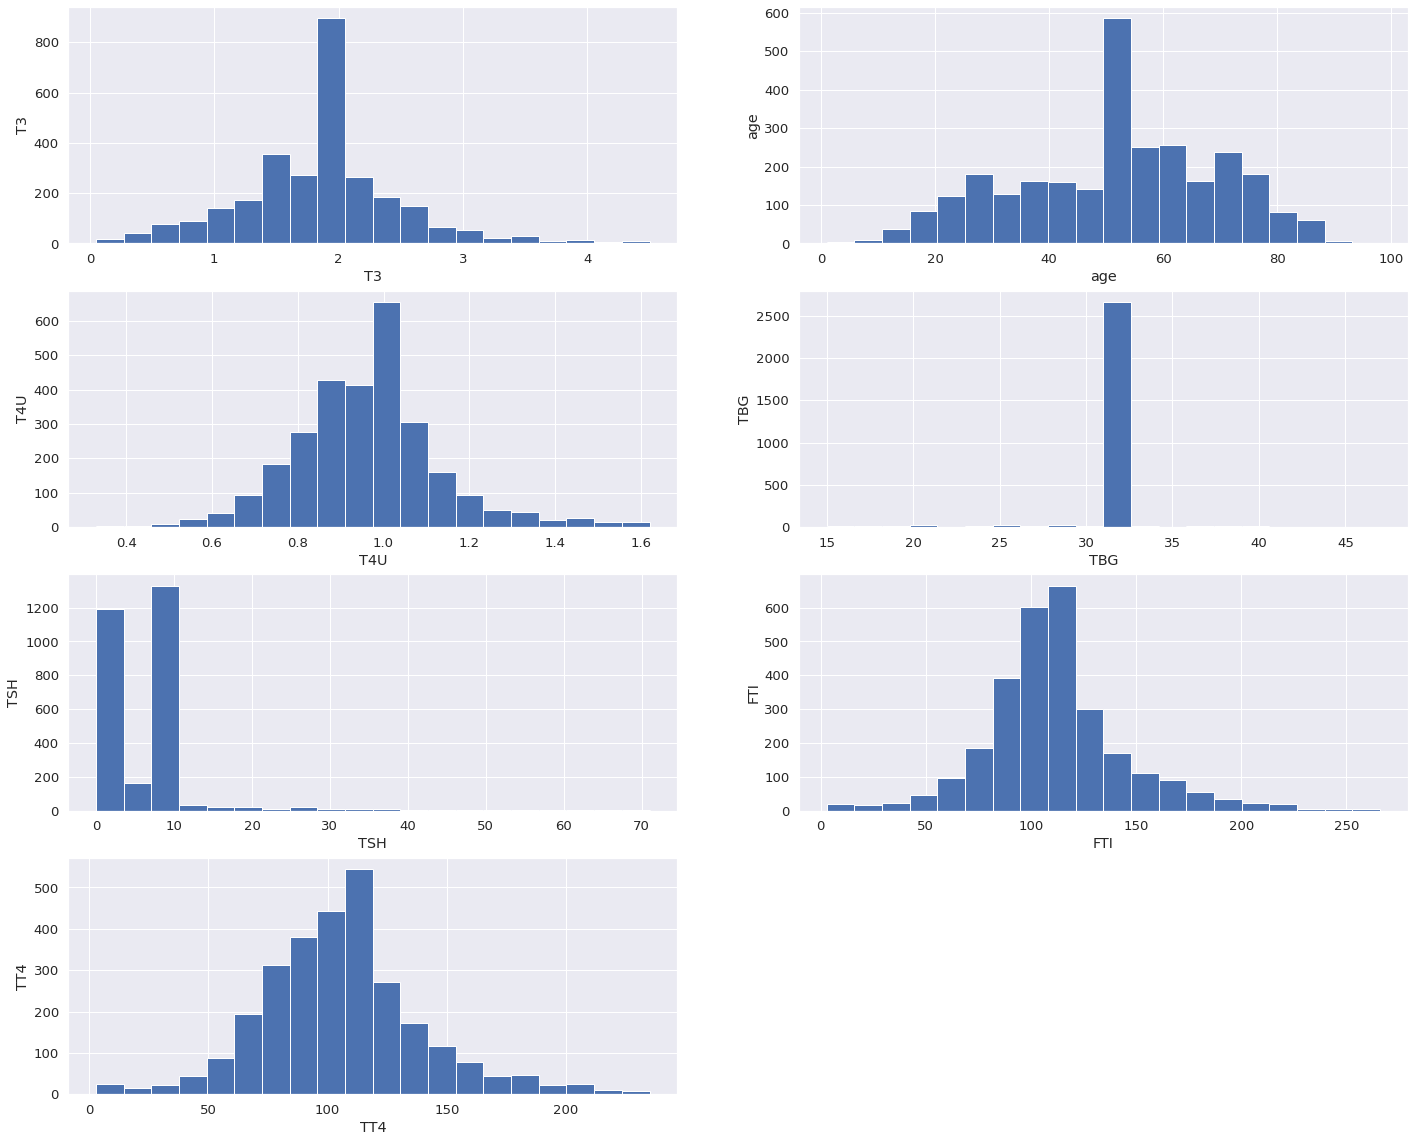

In [104]:
#Checking the distribution of continous variables
plt.figure(figsize=(24,20))

plt.subplot(4,2,1)
fig = hypothyloid['T3'].hist(bins=20)
fig.set_xlabel('T3')
fig.set_ylabel('T3')

plt.subplot(4,2,2)
fig = hypothyloid['age'].hist(bins=20)
fig.set_xlabel('age')
fig.set_ylabel('age')

plt.subplot(4,2,3)
fig = hypothyloid['T4U'].hist(bins=20)
fig.set_xlabel('T4U')
fig.set_ylabel('T4U')

plt.subplot(4,2,4)
fig = hypothyloid['TBG'].hist(bins=20)
fig.set_xlabel('TBG')
fig.set_ylabel('TBG')

plt.subplot(4,2,5)
fig = hypothyloid['TSH'].hist(bins=20)
fig.set_xlabel('TSH')
fig.set_ylabel('TSH')

plt.subplot(4,2,6)
fig = hypothyloid['FTI'].hist(bins=20)
fig.set_xlabel('FTI')
fig.set_ylabel('FTI')

plt.subplot(4,2,7)
fig = hypothyloid['TT4'].hist(bins=20)
fig.set_xlabel('TT4')
fig.set_ylabel('TT4')

All the variables are skewed

**Plitiing Pie Chart**

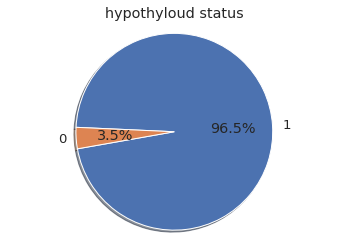

In [105]:
#Status pie chart representation
hypothyloid_status = hypothyloid['status'].value_counts()

#plotting pie chart
plt.pie(hypothyloid_status,labels = hypothyloid_status.index,autopct = '%1.1f%%',shadow=True,startangle=190)

#specify axis type
plt.axis('equal')

#setting the title
plt.title('hypothyloud status')

#Displaying the plot
plt.show()




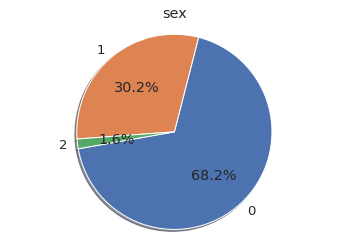

In [106]:
#Sex pie chart representation
sex = hypothyloid['sex'].value_counts()

#plotting pie chart
plt.pie(sex,labels = sex.index,autopct = '%1.1f%%',shadow=True,startangle=190)

#specify axis type
plt.axis('equal')

#setting the title
plt.title('sex')

#Displaying the plot
plt.show()


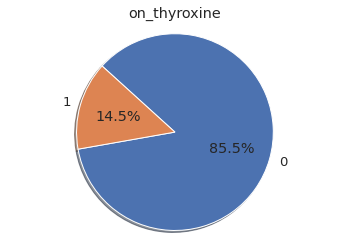

In [107]:
#on_thyroxine pie chart representation
on_thyroxine = hypothyloid['on_thyroxine'].value_counts()

#plotting pie chart
plt.pie(on_thyroxine,labels = on_thyroxine.index,autopct = '%1.1f%%',shadow=True,startangle=190)

#specify axis type
plt.axis('equal')

#setting the title
plt.title('on_thyroxine')

#Displaying the plot
plt.show()


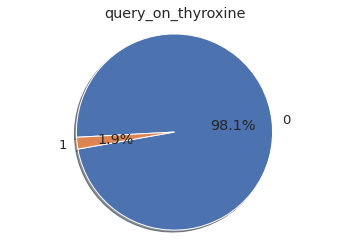

In [108]:
#query_on_thyroxine pie chart representation
query_on_thyroxine = hypothyloid['query_on_thyroxine'].value_counts()

#plotting pie chart
plt.pie(query_on_thyroxine,labels = query_on_thyroxine.index,autopct = '%1.1f%%',shadow=True,startangle=190)

#specify axis type
plt.axis('equal')

#setting the title
plt.title('query_on_thyroxine')

#Displaying the plot
plt.show()


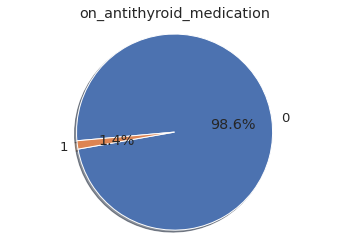

In [109]:
#on_antithyroid_medication pie chart representation
on_antithyroid_medication = hypothyloid['on_antithyroid_medication'].value_counts()

#plotting pie chart
plt.pie(on_antithyroid_medication,labels = on_antithyroid_medication.index,autopct = '%1.1f%%',shadow=True,startangle=190)

#specify axis type
plt.axis('equal')

#setting the title
plt.title('on_antithyroid_medication')

#Displaying the plot
plt.show()


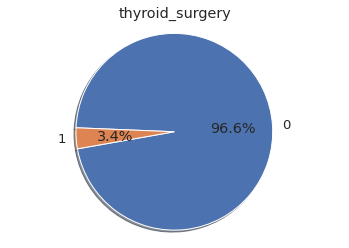

In [110]:
#thyroid_surgery pie chart representation
thyroid_surgery = hypothyloid['thyroid_surgery'].value_counts()

#plotting pie chart
plt.pie(thyroid_surgery,labels = thyroid_surgery.index,autopct = '%1.1f%%',shadow=True,startangle=190)

#specify axis type
plt.axis('equal')

#setting the title
plt.title('thyroid_surgery')

#Displaying the plot
plt.show()


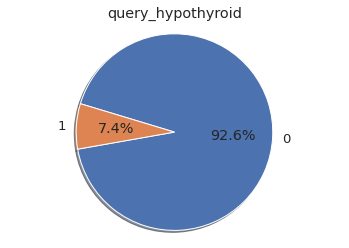

In [111]:
#query_hypothyroid pie chart representation
query_hypothyroid = hypothyloid['query_hypothyroid'].value_counts()

#plotting pie chart
plt.pie(query_hypothyroid,labels = query_hypothyroid.index,autopct = '%1.1f%%',shadow=True,startangle=190)

#specify axis type
plt.axis('equal')

#setting the title
plt.title('query_hypothyroid')

#Displaying the plot
plt.show()


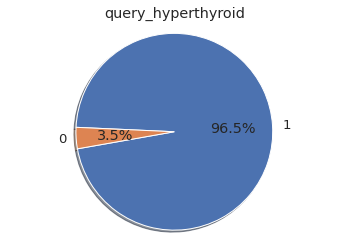

In [112]:
#query_hyperthyroid pie chart representation
query_hyperthyroid = hypothyloid['status'].value_counts()

#plotting pie chart
plt.pie(query_hyperthyroid,labels = query_hyperthyroid.index,autopct = '%1.1f%%',shadow=True,startangle=190)

#specify axis type
plt.axis('equal')

#setting the title
plt.title('query_hyperthyroid')

#Displaying the plot
plt.show()

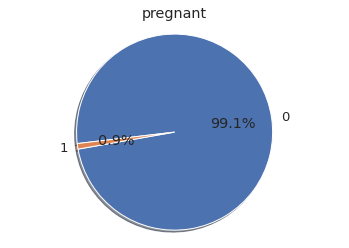

In [113]:
#pregnant pie chart representation
pregnant = hypothyloid['pregnant'].value_counts()

#plotting pie chart
plt.pie(pregnant,labels = pregnant.index,autopct = '%1.1f%%',shadow=True,startangle=190)

#specify axis type
plt.axis('equal')

#setting the title
plt.title('pregnant')

#Displaying the plot
plt.show()

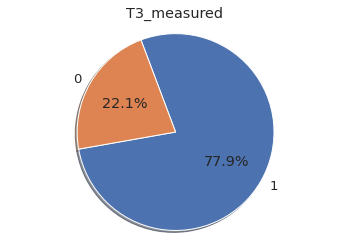

In [114]:
#T3_measured pie chart representation
T3_measured = hypothyloid['T3_measured'].value_counts()

#plotting pie chart
plt.pie(T3_measured,labels = T3_measured.index,autopct = '%1.1f%%',shadow=True,startangle=190)

#specify axis type
plt.axis('equal')

#setting the title
plt.title('T3_measured')

#Displaying the plot
plt.show()

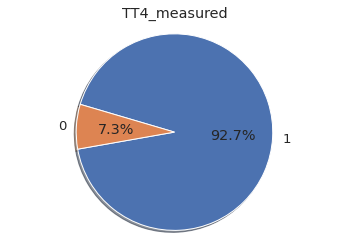

In [115]:
#TT4_measured pie chart representation
TT4_measured = hypothyloid['TT4_measured'].value_counts()

#plotting pie chart
plt.pie(TT4_measured,labels = TT4_measured.index,autopct = '%1.1f%%',shadow=True,startangle=190)

#specify axis type
plt.axis('equal')

#setting the title
plt.title('TT4_measured')

#Displaying the plot
plt.show()

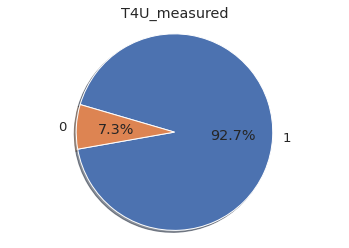

In [116]:
#T4U_measured pie chart representation
T4U_measured = hypothyloid['T4U_measured'].value_counts()

#plotting pie chart
plt.pie(T4U_measured,labels = T4U_measured.index,autopct = '%1.1f%%',shadow=True,startangle=190)

#specify axis type
plt.axis('equal')

#setting the title
plt.title('T4U_measured')

#Displaying the plot
plt.show()

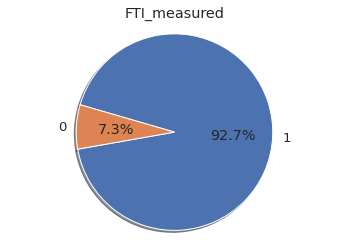

In [117]:
#FTI_measured pie chart representation
FTI_measured = hypothyloid['FTI_measured'].value_counts()

#plotting pie chart
plt.pie(FTI_measured,labels = FTI_measured.index,autopct = '%1.1f%%',shadow=True,startangle=190)

#specify axis type
plt.axis('equal')

#setting the title
plt.title('FTI_measured')

#Displaying the plot
plt.show()

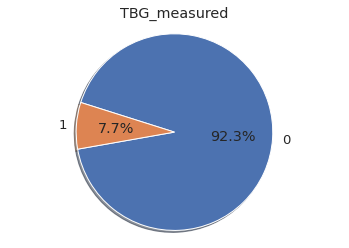

In [118]:
#TBG_measured pie chart representation
TBG_measured = hypothyloid['TBG_measured'].value_counts()

#plotting pie chart
plt.pie(TBG_measured,labels = TBG_measured.index,autopct = '%1.1f%%',shadow=True,startangle=190)

#specify axis type
plt.axis('equal')

#setting the title
plt.title('TBG_measured')

#Displaying the plot
plt.show()

In [119]:
hypothyloid.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,72.000,1,0,0,0,0,0,0,0,...,1,0.600,1,15.000,1,1.480,1,10.000,0,31.404
2,0,24.000,1,0,0,0,0,0,0,0,...,1,0.200,1,4.000,1,1.000,1,115.755,0,31.404


###b)Bivariate analysis

In [ ]:
#PairPlot
sns.pairplot(hypothyloid)

##Solving the Question

### Random Forest

 - For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

In [ ]:
#defining dependent and independent variables
X=hypothyloid.drop(columns=['status'],axis=1)
y=hypothyloid['status']

In [ ]:
#Spliting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# RandomForest Classifier algorithim
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100)
forest = forest.fit(X_train,y_train)
y_pred_for=forest.predict(X_test)

#The accuracy score
print('Accuracy Score for RandomForest Classifier:', sklearn.metrics.accuracy_score(y_test, y_pred_for))

Accuracy Score for RandomForest Classifier: 0.9895287958115183


In [ ]:
# Importing train_test_split from sklearn model selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [ ]:
#specifying the parameters in random forest
params = {"n_estimators": range(50, 300, 10),
          "criterion": ['gini', 'entropy'], 
          "max_depth": range(2, 8, 1)}


rf_random= RandomizedSearchCV(estimator = forest, param_distributions = params, n_iter=60, cv=10, random_state = 42, verbose =1, n_jobs =-1)

rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 10 folds for each of 60 candidates, totalling 600 fits


{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 270}

In [ ]:
#Random forest classfification with hyperparameters
forest=RandomForestClassifier(criterion= 'entropy', max_depth= 7, n_estimators= 160)
forest = forest.fit(X_train,y_train)
y_pred_for=forest.predict(X_test)

#The accuracy score
print('Accuracy Score for Randomforest Classifier:', sklearn.metrics.accuracy_score(y_test, y_pred_for))

Accuracy Score for Randomforest Classifier: 0.9895287958115183


In [ ]:
# Importing classification_report from sklearn metrics
from sklearn.metrics import classification_report

#Create classification report for Random forest
class_report_for= classification_report(y_test, y_pred_for)

print(class_report_for)

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.99      1.00      0.99       556

    accuracy                           0.99       573
   macro avg       0.93      0.88      0.90       573
weighted avg       0.99      0.99      0.99       573



###AdaBoost Classifier

In [ ]:
#Ada Boost algorithim for Regression
from sklearn.ensemble import AdaBoostClassifier
ada_boost=AdaBoostClassifier(
                            n_estimators=300)
ada_boost = ada_boost.fit(X_train,y_train)
y_pred_ada=ada_boost.predict(X_test)

#The accuracy score
print('Accuracy Score for AdaBoost Classifier:', sklearn.metrics.accuracy_score(y_test, y_pred_ada))

Accuracy Score for AdaBoost Classifier: 0.9842931937172775


In [ ]:
#specifying the parameters in AdaBoost classifier
params = {"n_estimators": range(50, 300, 10),
          "learning_rate": [0.01, 0.04, 0.07,0.1,0.13,0.16,0.19,0.21,
                            0.24,0.27,0.3,0.33,0.36,0.39,0.42,0.45,0.48,
                            0.51,0.54,0.57,0.60,0.64,0.67,0.70,0.73,0.76,0.79,
                            0.82,0.85,0.88,0.91,0.94,0.97,1.0 ]}


rf_random= RandomizedSearchCV(estimator = ada_boost, param_distributions = params, n_iter=60, cv=10, random_state = 42, verbose =1, n_jobs =-1)

rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 10 folds for each of 60 candidates, totalling 600 fits


{'learning_rate': 0.16, 'n_estimators': 170}

In [ ]:
#AdaBoost classfification with hyperparameters
Ada_boost=AdaBoostClassifier(learning_rate=0.33, n_estimators= 220)
Ada_boost = Ada_boost.fit(X_train,y_train)
y_pred_Ada_boost=Ada_boost.predict(X_test)

#The accuracy score
print('Accuracy Score for AdaBoost Classifier:', sklearn.metrics.accuracy_score(y_test, y_pred_Ada_boost))

Accuracy Score for AdaBoost Classifier: 0.9842931937172775


In [ ]:
# Importing classification_report from sklearn metrics
from sklearn.metrics import classification_report

#Create classification report for AdaBoost
class_report_AdaBoost= classification_report(y_test, y_pred_Ada_boost)

print(class_report_AdaBoost)

              precision    recall  f1-score   support

           0       0.70      0.82      0.76        17
           1       0.99      0.99      0.99       556

    accuracy                           0.98       573
   macro avg       0.85      0.91      0.87       573
weighted avg       0.99      0.98      0.98       573



###Gradient Boost Classifier

In [ ]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=300)
gbc = gbc.fit(X_train,y_train)

y_pred_gbc=gbc.predict(X_test)
#The accuracy score
print('Accuracy Score: for GradientBoost classifier:', sklearn.metrics.accuracy_score(y_test, y_pred_gbc))

Accuracy Score: for GradientBoost classifier: 0.9895287958115183


In [ ]:
#specifying the parameters in GradientBoost classifier
params = {"n_estimators": range(50, 300, 10),
          "loss": ['deviance', 'exponential'],
          "criterion": ['friedman_mse', 'squared_error'],
           "learning_rate": [0.01, 0.04, 0.07,0.1,0.13,0.16,0.19,0.21,
                            0.24,0.27,0.3,0.33,0.36,0.39,0.42,0.45,0.48,
                            0.51,0.54,0.57,0.60,0.64,0.67,0.70,0.73,0.76,0.79,
                            0.82,0.85,0.88,0.91,0.94,0.97,1.0 ]}


rf_random= RandomizedSearchCV(estimator = gbc, param_distributions = params, n_iter=60, cv=10, random_state = 42, verbose =1, n_jobs =-1)

rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 10 folds for each of 60 candidates, totalling 600 fits


{'criterion': 'squared_error',
 'learning_rate': 0.64,
 'loss': 'exponential',
 'n_estimators': 110}

In [ ]:
#GradientBoost classfification with hyperparameters
gbc=GradientBoostingClassifier(criterion= 'friedman_mse',learning_rate= 0.27,loss= 'exponential',n_estimators= 90)
gbc = gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)

#The accuracy score
print('Accuracy Score for GradientBoost Classifier:', sklearn.metrics.accuracy_score(y_test, y_pred_gbc))

Accuracy Score for GradientBoost Classifier: 0.987783595113438


In [ ]:
# Importing classification_report from sklearn metrics
from sklearn.metrics import classification_report

#Create classification report for AdaBoost
class_report_gbc= classification_report(y_test, y_pred_gbc)

print(class_report_gbc)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.99      0.99      0.99       556

    accuracy                           0.99       573
   macro avg       0.89      0.91      0.90       573
weighted avg       0.99      0.99      0.99       573



Among the three classifiers, random forest has the highest precision of 87% hence it will be used in feature selection.

###Model Chosen is Random forest

In [ ]:
# let's create a dictionary of features and their importance values
feat_dict= {}
for col, val in sorted(zip(X_train.columns, forest.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

In [ ]:

# Dataframe with features and their importance score
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})

# Preview dataframe
feat_df

,Feature,Importance
0,FTI,0.300
1,TSH,0.284
2,TT4,0.240
3,T3,0.052
4,T4U,0.038
5,age,0.032
6,query_hypothyroid,0.010
7,thyroid_surgery,0.009
8,TSH_measured,0.006
9,sex,0.005


Ranking of the most important features

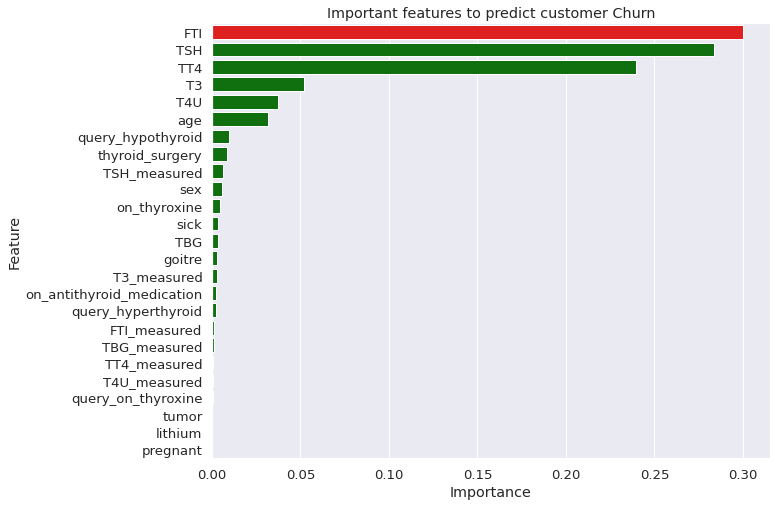

In [ ]:
# Visualization of the features with their importances
values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict customer Churn')
plt.show()

In [ ]:
#Selecting a model
sel = SelectFromModel(RandomForestClassifier(criterion= 'entropy', max_depth= 7, n_estimators= 160))
sel.fit(X_train, y_train)
#Displaying features thst are important

SelectFromModel(estimator=RandomForestClassifier(criterion='entropy',
                                                 max_depth=7,
                                                 n_estimators=160))

**True ** for features whose importance is greater thanthe mean of importance and 

**False** for the rest.

In [ ]:
#Making  list and count the selected features
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

#Getting the name of the features selected
print(selected_feat)

Index(['TSH', 'T3', 'TT4', 'FTI'], dtype='object')


Selection of the most important features

##SVM

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

**Declaring feature vector and target variable**

In [165]:
#Separating target variabl from the dataset
X = hypothyloid.drop(columns=['status'],axis=1)
y=hypothyloid['status']


In [166]:
#Applying PCA since it is a reduction algorithm
pca=PCA(n_components=2).fit(X)
X=pca.transform(X)
X.shape

(2861, 2)

In [167]:
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

###Polynomial Function

In [168]:
#creating the model
pol_classifier = SVC(kernel='poly',degree=3)

#Training the model
pol_classifier.fit(X_train,y_train)

SVC(kernel='poly')

**Visualization**

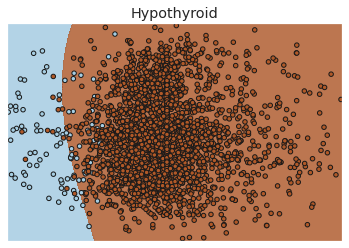

In [169]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = pol_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, pol_classifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

- The brown color indicates the patients with hypothyroid and it covers the largest part indicating that large number of patients have hypothyroid and the blue ones indicates that they do not have hypothyroid. 

- The blue and the brown seeds mingles indicating that the patients who have hypothyroid and those who do not have it shares some of the symptoms.

**Prediction**

In [170]:
#Making the prediction
y_pred_poly = pol_classifier.predict(X_test)

In [171]:
#Evaluating the model
print(accuracy_score(y_test, y_pred_poly))
# print(confusion_matrix(y_test,y_pred))

0.9790575916230366


**Hyperparameter tuning**

In [172]:
# Importing train_test_split from sklearn model selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV

#creating the model
pol_classifier = SVC(kernel='poly',degree=3,C=1)

#Training the model
pol_classifier.fit(X_train,y_train)

# Importing classification_report from sklearn metrics
from sklearn.metrics import classification_report

#Create classification report for AdaBoost
class_report_gbc= classification_report(y_test, y_pred_poly)

print(class_report_gbc)

              precision    recall  f1-score   support

           0       0.69      0.53      0.60        17
           1       0.99      0.99      0.99       556

    accuracy                           0.98       573
   macro avg       0.84      0.76      0.79       573
weighted avg       0.98      0.98      0.98       573



###Radial Basis Function

In [173]:
#Building the model
rbf_classifier = SVC(kernel='rbf')

#Training the model
rbf_classifier.fit(X_train,y_train)

SVC()

**Visualizing the model**

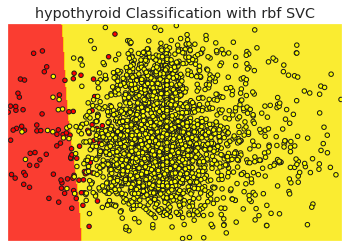

In [174]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('hypothyroid Classification with rbf SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbf_classifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [175]:
#Making the prediction
y_pred_rbf = rbf_classifier.predict(X_test)

#Evaluating the model
print(accuracy_score(y_test, y_pred_rbf))

0.9808027923211169


**Optimization**

In [183]:
# Importing train_test_split from sklearn model selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV

#creating the model
rbf_classifier = SVC(kernel='rbf',C=1000)

#Training the model
rbf_classifier.fit(X_train,y_train)

# Importing classification_report from sklearn metrics
from sklearn.metrics import classification_report

#Create classification report for AdaBoost
class_report_rbf= classification_report(y_test, y_pred_rbf)

print(class_report_rbf)

              precision    recall  f1-score   support

           0       0.71      0.59      0.65        17
           1       0.99      0.99      0.99       556

    accuracy                           0.98       573
   macro avg       0.85      0.79      0.82       573
weighted avg       0.98      0.98      0.98       573



###Linear

In [177]:
#Building the model
lin_classifier = SVC(kernel='linear')

#Training the model
lin_classifier.fit(X_train,y_train)

SVC(kernel='linear')

**Visualizing the model**

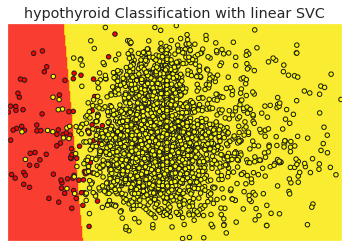

In [178]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = lin_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('hypothyroid Classification with linear SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, lin_classifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [179]:
#Making the prediction
y_pred_lin = lin_classifier.predict(X_test)

#Evaluating the model
print(accuracy_score(y_test, y_pred_lin))

0.9808027923211169


**Optimization**

In [182]:
# Importing train_test_split from sklearn model selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV

#creating the model
pol_classifier = SVC(kernel='linear',C=1000)

#Training the model
pol_classifier.fit(X_train,y_train)

# Importing classification_report from sklearn metrics
from sklearn.metrics import classification_report

#Create classification report for AdaBoost
class_report_lin= classification_report(y_test, y_pred_lin)

print(class_report_lin)

              precision    recall  f1-score   support

           0       0.71      0.59      0.65        17
           1       0.99      0.99      0.99       556

    accuracy                           0.98       573
   macro avg       0.85      0.79      0.82       573
weighted avg       0.98      0.98      0.98       573



##Conclusion

The The major symptoms for thyroidsm includes:
- TSH
- T3
- TT4
- FTI